In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Opgave 11.1
Lad $P_3$ være vektorrummet af polynomier af grad højst 3.
Bestem koordinatvektorene af polynomiet $p(x)=(x-1)^3$ mht til basen E: $x^3, x^2,x,1$

Vi opstiller ligningsystemet:
$$
(x-1)^3 =  \begin{bmatrix}s0\\s1\\s2\\s3\\\end{bmatrix}\begin{bmatrix}x^3,x^2,x,1\end{bmatrix}
$$
Dette gør vi grundet definition 19.6.
Ved at løse dette ved kvadratsætinger kommer vi frem til at:
$$
s0=1,s1=-3,s2=3,s4=-1
$$

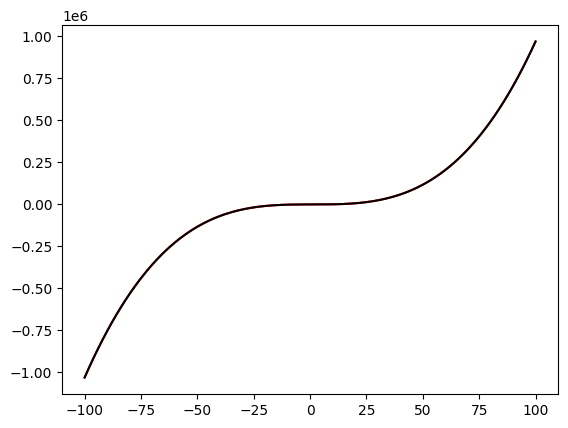

In [2]:
fig, ax = plt.subplots()
x = np.linspace(-100,100,200)
def p(x):
    return (x-1)**3

def t(x):
    return x**3+(-3)*x**2+(3)*x+(-1)*1

ax.plot(x,p(x), color="red")
ax.plot(x,t(x), "-", color = "black")


## Opgave 11.2.

Bestem koordinatvektorerne af punktet $p=(1,-1,2,4) \in \mathbb{R}^4  \mathrm{mht}$. til hver af de følgende baser.

(a) $E:(1,0,0,0),(1,1,0,0),(1,1,1,0),(1,1,1,1)$.

(b) $F:(1 / 2,-1 / 2,1 / 2,-1 / 2),(1 / \sqrt{2}, 1 / \sqrt{2}, 0,0),(0,0,1 / \sqrt{2}, 1 / \sqrt{2})$, $(1 / 2,-1 / 2,-1 / 2,1 / 2)$.

Angiv koordinatskiftsmatricen fra $E$ til $F$, og bekræft at dette giver den korrekte relation mellem koordinatvektorerne af $p$ mht. $E$ og hhv. $F$.


### a
Først kan vi samle de 4 $v_i$ fra E til:
$$
E= 
\begin{bmatrix}
1 & 1 & 1 & 1\\
0 & 1 & 1 & 1 \\
0 & 0 & 1 & 1\\
0 & 0 & 0 & 1\end{bmatrix}
$$

Udfra defination 19.6 finder vi koordinatvektoren ved at løse ligningssystemet:
$$
(1,-1,2,4)=\begin{bmatrix}
1 & 1 & 1 & 1 & | 1\\
0 & 1 & 1 & 1  & | -1\\
0 & 0 & 1 & 1 & | 2\\
0 & 0 & 0 & 1 & | 4\end{bmatrix}
$$
$$
(1,-1,2,4)=\begin{bmatrix}
1 & 0 & 0 & 0 & | &2\\
0 & 1 & 0 & 0  & | &-3\\
0 & 0 & 1 & 0 & | &-2\\
0 & 0 & 0 & 1 & | &4\end{bmatrix}
$$
Derved har vi koordinatsvekotren: $\begin{bmatrix}2\\-3\\-2\\4\end{bmatrix}$

### b
$$
(1,-1,2,4)=\begin{bmatrix}
0.5 & \frac{1}{\sqrt{2}} & 0 & 0.5 & | &1\\
-0.5 & \frac{1}{\sqrt{2}} & 0 & -0.5  & | &-1\\
0.5 & 0 & \frac{1}{\sqrt{2}} & -0.5 & | &2\\
-0.5 & 0 & \frac{1}{\sqrt{2}} & 0.5 & | &4\end{bmatrix}
$$


In [26]:
a =  np.array([
    [0.5, 1/np.sqrt(2), 0, 0.5, 1],
    [-0.5, 1/np.sqrt(2), 0, -0.5, -1],
    [0.5, 0, 1/np.sqrt(2), -0.5, 2],
    [-0.5, 0, 1/np.sqrt(2), 0.5, 4]
])
# Change matrix to used matrix
def change(i,j):
    a[[i,j],:] = a[[j,i],:]
def factor(i,s):
    a[i,:] *= s
def add(i,j,s):
    a[i,:] += t*a[j,:]
def sub(i,j,t):
    a[i,:] -= t*a[j,:]

factor(0,np.sqrt(2))
factor(1,np.sqrt(2))
factor(2,np.sqrt(2))
factor(3,np.sqrt(2))
sub(0,1,-1)
factor(0,0.5)
sub(1,0,1)
factor(1,-np.sqrt(2))
sub(3,1,-1/np.sqrt(2))
factor(2,np.sqrt(2))
sub(2,1,1)
factor(2,1/np.sqrt(2))
sub(3,2,1)
factor(3,1/a[3,3])
sub(1,3,1)
sub(2,3,-1)
sub(2,3,a[2,3])
change(0,1)
print(np.round(a,10))

b =  np.array([
    [0.5, 1/np.sqrt(2), 0, 0.5, 1],
    [-0.5, 1/np.sqrt(2), 0, -0.5, -1],
    [0.5, 0, 1/np.sqrt(2), -0.5, 2],
    [-0.5, 0, 1/np.sqrt(2), 0.5, 4]
])
solution = a[:,4]
check =  b[:,0:4] @ solution
print(np.round(check))

[[ 1.         -0.         -0.          0.          0.        ]
 [ 0.          1.          0.          0.          0.        ]
 [ 0.          0.          1.          0.          4.24264069]
 [ 0.          0.          0.          1.          2.        ]]
[ 1. -1.  2.  4.]


## Opgave 11.3.

Lad
$$
A=\left[\begin{array}{ccccc}
3 & 6 & -1 & 3 & 1 \\
1 & 2 & 1 & -1 & -1 \\
2 & 4 & 0 & 1 & 1
\end{array}\right] .
$$

(a) Bestem den reducerede echelonform for $A$, og brug dette til at angive baser for søjlerummet $S(A)$ og nulrummet $N(A)$.

(b) Vis at vektoren $(0,0,1)$ tilhører søjlerummet $S(A)$.

(c) Brug det overstående til at bestemme alle løsninger $x \in \mathbb{R}^5$ til $A x=$ $(0,0,1)$.

## a

In [7]:
a = np.array([
    [3.0, 6.0, -1.0, 3.0, 1.0],
    [1.0, 2.0, 1.0, -1.0, -1.0],
    [2.0, 4.0, 0.0, 1.0, 1.0]
])

# Change matrix to used matrix
def change(i,j):
    a[[i,j],:] = a[[j,i],:]
def factor(i,s):
    a[i,:] *= s
def add(i,j,s):
    a[i,:] += t*a[j,:]
def sub(i,j,t):
    a[i,:] -= t*a[j,:]

factor(0,(1/3))
factor(2,(1/4))
sub(1,2,2)
sub(2,0,0.5)
sub(2,1,a[2,2])
factor(2,3)
sub(0,1,-2/3)
sub(0,1,1/3)
print(a)

[[ 1.          2.          0.          0.5        -0.16666667]
 [ 0.          0.          1.         -1.5        -1.5       ]
 [ 0.          0.          0.          0.          1.        ]]


Derved har vi at S(A) =
$$
\begin{bmatrix}
3\\1\\2
\end{bmatrix},
\begin{bmatrix}
-1\\1\\0
\end{bmatrix}
,
\begin{bmatrix}
1\\-1\\1
\end{bmatrix}
$$
Og derved er N(A)=

Her har vi systemet:
$$
\begin{align}
x_0 + 2x_1 + 0.5x_3 -\frac{1}{6}x_4 = 0\\
x_2 -1.5x_3 -1.5x_4 = 0\\
x_4 = 0\\
\end{align}
$$
Derved får vi:

$$
\begin{pmatrix}
x_0\\
x_1\\
x_2\\
x_3\\
x_4\\
\end{pmatrix}
=
\begin{pmatrix}
-2x_1 - 0.5x_3 + \frac{1}{6}x_4\\
x_1\\
1.5x_3 + 1.5x_4\\
x_3\\
0\\
\end{pmatrix}
=
\begin{pmatrix}
-2x_1 - 0.5x_3\\
x_1\\
1.5x_3\\
x_3\\
0\\
\end{pmatrix}
=
x_1
\begin{pmatrix}
-2\\
1\\
0\\
0\\
0\\
\end{pmatrix}
+
x_3
\begin{pmatrix}
-0.5\\
0\\
1.5\\
1\\
0
\end{pmatrix}
$$
Derved er de disse to vektorer der uspænder nulrummet:


## b
Dette er en del af søjlerummet da vi kan lave den ved:
$$
0
\begin{bmatrix}
3\\1\\2
\end{bmatrix}
+
1
\begin{bmatrix}
-1\\1\\0
\end{bmatrix}
+
1
\begin{bmatrix}
1\\-1\\1
\end{bmatrix}
=
\begin{bmatrix}
0\\0\\1
\end{bmatrix}
$$


## c


In [29]:
firstVector = np.array([0,0,1,0,1])
n1 = np.array([-2,1,0,0,0])
n2 = np.array([-0.5,0,1.5,1,0])
a = np.array([
    [3.0, 6.0, -1.0, 3.0, 1.0],
    [1.0, 2.0, 1.0, -1.0, -1.0],
    [2.0, 4.0, 0.0, 1.0, 1.0]])

check = a @ (firstVector + 7*n1 + 3*n2)
print(check)

[0. 0. 1.]


## Opgave 11.4.
Lad $P_2$ være vektorrummet, som bestăr af polynomier af grad højst 2. Betragt den lineære afbildning $L: P_2 \rightarrow \mathbb{R}^3$ givet ved
$$
L(p)=(p(0), p(1), p(2)) .
$$

Bestem matricen $A$ af $L$ mht. baserne $E: x^2, x, 1$ af $P_2$ og standardbasen $F:(1,0,0)$, $(0,1,0),(0,0,1)$ af $\mathbb{R}^3$. Vis at $A$ er invertibel. Hvad kan du nu sige om ker $L$ og $\operatorname{im} L$ ?


$$
u_0 = (0^2,1^2,2^2) = (0,1,4)\\
u_1 = (0,1,2) = (0,1,2)\\
u_2 = (1,1,1) = (1,1,1)\\
$$
$$
A=
\begin{pmatrix}
0 & 0 & 1\\
1 & 1 & 1\\
4 & 2 & 1
\end{pmatrix}
$$
sætning 20.4 siger at kernen = nulrummet og im = s(a). I vores tilfælde er nulrummet = 0 og søjlerummet er alle søjler


## Opgave 11.5.
Lad $V$ være rummet af funktioner $f:[-\pi, \pi] \rightarrow \mathbb{R}$ som er differentiabel vilkårligt mange gange. Lad $L: V \rightarrow V$ være den lineære funktion $L(f)=f^{\prime \prime}+f$.

(a) Bestem en basis for kernen $\operatorname{ker} L$.

Basen er sin(x) og cos(x) da L(sin(x)) = L(cos(x)) = 0

(b) Find et polynomium $p(x)$ således at $L(p)(x)=x-1$.

p = x-1


(c) Bestem alle elementer $f$ af $V$, der opfylder $L(f)(x)=x-1$.

p = s0 sin(x) + s1 cos(x) + x-1

## Opgave 11.6.
### FØLG AFSNIT 17.2
Husk at Legendre polynomier $P_k(x)$ er ortogonale for $\operatorname{det} L^2$-indre produkt på rummet af kontinuerte funktioner $[-1,1] \rightarrow \mathbb{R}$. For hvert $k$, sæt $\tilde{P}_k(x)=P_k(2 x-1)$.

(a) I python brug de indbyggede Legendre polynomier og bekræft at $\tilde{P}_k(x)$ for $k=0,1,2,3,4$ er nogenlunde ortogonale for det $L^2$-indre produkt på rummet af kontinuerte funktioner $[0,1] \rightarrow \mathbb{R}$.

(b) I python sæt $t=n p$. $\operatorname{linspace}(\theta, 1,100)$ og dan matricen a_legendre af størrelsen $100 \times 15$ hvis søjler består af $\tilde{P}_k(\mathrm{t})$ for $k=0,1, \ldots, 13,14$.

(c) Bestem konditionstallene for det mindste kvadraters problem for funktionen $f(t)=e^{\sin (4 t)} / c$ fra afsnit 17.2 med ny koefficient matrix a_legendre.


Der burde kunne ses at konditionstallene er væsentlig mindre end i afsnit 17.2, så approksimering af $f$ ved mindste kvadraters problemet via disse polynomier ville giver et væsentlig mere præcist svar.